# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff y Felipe Tobar  

**Fecha:** 11 octubre, 2019


# Módulo 3 - Contenidos
- Pandas y DataFrames
- Acceso a SQL a través de Pandas

Introduction to Pandas: http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/
DataFrame API: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

## 1) Introducción
El manejo adecuado de datos es (naturalmente) un aspecto fundamental en ciencia de datos. Como se ha visto, NumPy permite un manejo básico de datos a través de sus operaciones sobre arreglos. No obstante, las tareas referentes al manejo de datos requieren habitualmente de funcionalidades más especificas.

### ¿Qué es Pandas?

Pandas es una librería open source para análisis de datos. Python siempre ha sido fantástico para preparar y montar datos, sin embargo, Python no es necesariamente bueno cuando hay que analizar datos. Uno regularmente termina usando R o cargando la base de datos usando SQL (o peor aún, Excel). 

Pandas hace que Python pueda ser usado satisfactoriamente para analizar datos. Podemos considerar Pandas como una extensión de NumPy basada en software libre y dirigida específicamente a la manipulación y análisis de datos en Python.

### ¿Cómo se relaciona Pandas con el resto de la suite de Python?

Pandas provee estructuras y operaciones para el trabajo de tablas numéricas y series de tiempo, es estándar en aplicaciones de ciencia de datos (basadas en Python). Se usa en conjunto con librerías de computación numérica (como Numpy y SciPy), librerías de visualización (como `matplotlib` y `seaborn`), librerías de analítica (como `statsmodels` y `scikit-learn`), entre otras.

El manejo de datos con Pandas toma los elementos de Numpy en cuanto a computación basada en arreglos y los expande al manejo de datos heterogéneos.



Como convención, Pandas se importa de la siguiente manera:

In [2]:
import pandas as pd

## 2) Estructuras de datos

Pandas propone dos nuevas estructuras de datos: Series y DataFrame, ambas construidas sobre NumPy (es decir, rápidas). Una serie es un objeto cuya estructura consiste en un arreglo unidimensional que contiene una sucesión de valores al cual se asocia un nuevo arreglo con las etiquetas de los datos, este último arreglo se denota como índice o index.

### 2.1) Series

Una Serie es un objeto unidimensional similar a un arreglo, lista, columna o tabla. La Serie tiene un índice asignado a cada ítem en la serie. Por defecto, cada ítem recibe un índice que va de 0 a N, donde N es el largo de la Serie menos uno.


In [5]:
# creamos una Series con valores arbitrarios
s = pd.Series([7, 'BancoEstado', 3.14, -1789710578, '¡Hoy es viernes!'])
print(s)

0                   7
1         BancoEstado
2                3.14
3         -1789710578
4    ¡Hoy es viernes!
dtype: object


In [7]:
s[1]  # imprimir el tercero elemento con index dos

'BancoEstado'

### 2.2) Índices
Los índices definen las referencias a los elementos o rangos de elementos en la serie. El índice puede ser numérico, textual, fechas, ...

In [11]:
#imprimir los indices  (por defecto)
print(s.index.values)

[0 1 2 3 4]


Podemos asignar nuestros propios valores de los índices de las siguientes formas, la primera es modificando el objeto `s.index`, es decir

In [15]:
s.index = ['i','n','d','e','x']
s

i                   7
n         BancoEstado
d                3.14
e         -1789710578
x    ¡Hoy es viernes!
dtype: object

Alternativamente, podemos construir la serie directamente con valores para sus índices:

In [18]:
s2 = pd.Series([7, 'BancoEstado', 3.14, -1789710578, '¡Hoy es viernes!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s2

A                   7
Z         BancoEstado
C                3.14
Y         -1789710578
E    ¡Hoy es viernes!
dtype: object

El constructor de la serie puede tomar un _diccionario_ también. Veamos a  continuación la construcción de una serie que contiene los habitantes de las principales ciudades de Chile (en base a su población) desde un diccionario que contiene esa información. 

In [36]:
dicc = {'Santiago': 6139087, 'Concepción': 972714, 'Valparaíso': 951311, 
     'Coquimbo': 399450, 'Antofagasta': None}
ciudades = pd.Series(dicc)
ciudades

Santiago       6139087.0
Concepción      972714.0
Valparaíso      951311.0
Coquimbo        399450.0
Antofagasta          NaN
dtype: float64

Los índices sirven precisamente para referenciar (y cambiar!) los valores de la lista, en particular para _llamarlos_

In [37]:
#rescatar el valor para una ciudad
ciudades['Santiago']

6139087.0

In [60]:
#reasigna el valor para una ciudad
ciudades['Santiago'] = 6200000
print(ciudades['Santiago'])

6200000.0


In [38]:
#rescatar el valor para múltiples ciudades
ciudades[['Santiago','Concepción']]

Santiago      6139087.0
Concepción     972714.0
dtype: float64

Podemos incluso usar _indexacción booleana_ es decir:

In [41]:
ciudades[ciudades < 500000]

Coquimbo    399450.0
dtype: float64

para entender esto, veamos que el enunciado `ciudades > 500000` entrega un arreglo de variables booleanas (*True* y *False*) denotando las posiciones donde se cumple el enunciado. Luego, al pasar este arreglo booleano como _indices_ del arreglo, solo se reportan  los valores para las entradas _True_

In [46]:
arreglo = ciudades > 500000
print('Arreglo de booleans es:')
print(arreglo)
print('\n')
print('Arreglo de ciudades es:')
print(ciudades[arreglo])

Arreglo de booleans es:
Santiago        True
Concepción      True
Valparaíso      True
Coquimbo       False
Antofagasta    False
dtype: bool


Arreglo de ciudades es
Santiago      6139087.0
Concepción     972714.0
Valparaíso     951311.0
dtype: float64


Estos operadores booleanso sirven también para verificar si un índice pertenece a la serie, por ejemplo

In [57]:
print('Santiago' in ciudades)
print('Peor es Nada' in cities)

True
False


Podemos incluso asignar rangos de fechas a nuestros índices usando la método `pandas.date_range`

In [53]:
s3 = pd.Series([7, 5, 3.14, -178, 0.27, 55])
s3.index = pd.date_range(start='2019-01-01', end='2019-01-06', freq='D')
s3

2019-01-01      7.00
2019-01-02      5.00
2019-01-03      3.14
2019-01-04   -178.00
2019-01-05      0.27
2019-01-06     55.00
Freq: D, dtype: float64

Finalmente, veamos que podemos asignar multiples índices usando  de fechas a nuestros índices usando la método `pandas.MultiIndex.from_arrays`

In [54]:
s3.index = pd.MultiIndex.from_arrays(
    [[0,0,0,1,1,1], ['a','b','c','a','b','c']])
s3

0  a      7.00
   b      5.00
   c      3.14
1  a   -178.00
   b      0.27
   c     55.00
dtype: float64

In [55]:
s3[1]

a   -178.00
b      0.27
c     55.00
dtype: float64

In [56]:
s3[1]['b']

0.27

In [ ]:
Podemos verificar si 

### 2.2) Datos
En el fondo, los datos en Pandas objectos (`Index`, `Series`, `DataFrame`) son arreglos de datos, y Pandas sólo proviene una manera de manejar los.

In [41]:
serie.array

<PandasArray>
[1, 9, 7, -5, 3, 10]
Length: 6, dtype: int64

In [55]:
serie.values

array([ 1,  9,  7, -5,  3, 10])

In [56]:
serie.index.values

array([(0, 'a'), (0, 'b'), (0, 'c'), (1, 'a'), (1, 'b'), (1, 'c')],
      dtype=object)

### 2.3) Crear atraves diccionários

In [71]:
dic = {'a1': 7, 'a2': 6.5 , 'a3': 5, 'a4':2.1, 'a1000':1 }
serie_a = pd.Series(dic)
serie_a

a1       7.0
a2       6.5
a3       5.0
a4       2.1
a1000    1.0
dtype: float64

In [72]:
idx_b = ['a1','a2','b']
serie_b = pd.Series(serie_a, index=idx_b)

In [73]:
serie_b

a1    7.0
a2    6.5
b     NaN
dtype: float64

## 3) DataFrame
Una serie representa un arreglo unidimensional enriquecido por índices y manejo de valores faltantes. Un `DataFrame` por su parte, representa una tabla rectangular, donde los datos están contenidos en una estructura ordenada y basada en columnas, las cuales pueden ser de distintos tipos (`int`, `str`, `bool`).

Un `DataFrame` posee índices para sus columnas y sus filas. Al igual que la series, se puede observar como un diccionario de NumPy donde cada campo es una serie, cada una de las cuales, comparten el mismo índice. Si bien esta noción describe un objeto 2-dimensional, es posible obtener representaciones dimensionalmente superiores mediante una indexación adecuada.

Existen varias formas de construir un `DataFrame`, una manera conveniente, consiste en definir un diccionario de listas, todas de igual longitud:

In [114]:
data = {'ciudad': ['Temuco', 'Temuco', 'Temuco', 'Iquique', 'Iquique', 'Iquique'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df = pd.DataFrame(data)
df

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


In [81]:
df.shape

(6, 3)

In [75]:
df.head(3)

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6


In [84]:
display(df.index)
display(df.columns)
display(df.values)
display(df.shape)
display(df.count())
df.info()

RangeIndex(start=0, stop=6, step=1)

Index(['ciudad', 'year', 'pob'], dtype='object')

array([['Temuco', 2000, 1.5],
       ['Temuco', 2001, 1.7],
       ['Temuco', 2002, 3.6],
       ['Iquique', 2001, 2.4],
       ['Iquique', 2002, 2.9],
       ['Iquique', 2003, 3.2]], dtype=object)

(6, 3)

ciudad    6
year      6
pob       6
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
ciudad    6 non-null object
year      6 non-null int64
pob       6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [83]:
df.describe()

,year,pob
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


### 3.1) Seleccionar datos

In [85]:
df['pob']  # seleccionando la columna 'year' nos da una serie

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pob, dtype: float64

In [86]:
df.pob  # forma más corta

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pob, dtype: float64

In [88]:
df[0:3]  # selectionar un rango

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6


### 3.2) Selectionar por etiquetas
Para obtener una sección usando etiquetas, y una selección multi-eje:

In [92]:
df.index = ['a','b','c','d','e','f']
df.loc['d']

ciudad    Iquique
year         2001
pob           2.4
Name: d, dtype: object

In [95]:
df.loc['b':'e', ['year']]

,year
b,2001
c,2002
d,2001
e,2002


### 3.3) Selectionar por posición
Se selecciona la posición de los indices entregados

In [96]:
df.iloc[3]

ciudad    Iquique
year         2001
pob           2.4
Name: d, dtype: object

In [98]:
df.iloc[1:5, 0:2]

,ciudad,year
b,Temuco,2001
c,Temuco,2002
d,Iquique,2001
e,Iquique,2002


### 3.4) Selectionar por booleanos

In [100]:
df.loc[[False, False, True, False, True, True]]

,ciudad,year,pob
c,Temuco,2002,3.6
e,Iquique,2002,2.9
f,Iquique,2003,3.2


In [101]:
df.pob > 3.0

a    False
b    False
c     True
d    False
e    False
f     True
Name: pob, dtype: bool

In [103]:
df[df.pob > 3.0]

,ciudad,year,pob
c,Temuco,2002,3.6
f,Iquique,2003,3.2


## 4) Aggregate y GroupBy
`GroupBy` te da la oportunidád de grupar datos y agregar.

In [139]:
df = pd.DataFrame({'Pájaro': ['Falcon', 'Falcon', 'Eagle', 'Eagle', 'Eagle', 'Condor', 'Condor', 'Condor'],
                   'Velocidad': [80., 65., 45., 51., 49., 54., 50., 62.]})
df

,Pájaro,Velocidad
0,Falcon,80.0
1,Falcon,65.0
2,Eagle,45.0
3,Eagle,51.0
4,Eagle,49.0
5,Condor,54.0
6,Condor,50.0
7,Condor,62.0


In [140]:
df.groupby(['Pájaro']).mean()  # lo mismo que:  df.groupby('Pájaro').aggregate(np.mean)

,Velocidad
Pájaro,
Condor,55.333333
Eagle,48.333333
Falcon,72.500000


In [141]:
df.groupby('Pájaro').aggregate(np.min)

,Velocidad
Pájaro,
Condor,50.0
Eagle,45.0
Falcon,65.0


## 5) Graficar

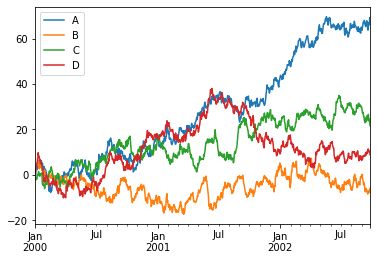

In [119]:
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=list('ABCD'))
df = df.cumsum()
df.plot();

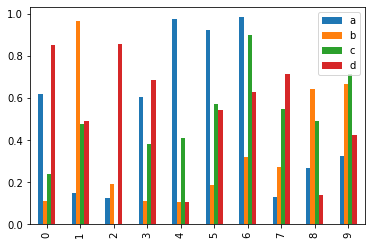

In [123]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar();

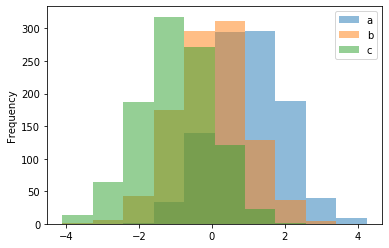

In [122]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1},
                  columns=['a', 'b', 'c'])
df.plot.hist(alpha=0.5);

## 6) Cargando CSV, Excel, HDF5
Pandas es capaz de cargar una variedad de tipos de datos, incluyo: CSV, JSON, HTML, Excel, HDF5, Stata, SAS, SQL, ...

In [124]:
df = pd.DataFrame({'ciudad': ['Temuco', 'Temuco', 'Temuco', 'Iquique', 'Iquique', 'Iquique'],
                   'year': [2000, 2001, 2002, 2001, 2002, 2003],
                   'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]})

### 6.1) CSV

In [125]:
df.to_csv('poblacion.csv')

In [126]:
pd.read_csv('poblacion.csv', index_col=0)

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


### 6.2) XLSX

In [127]:
df.to_excel('poblacion.xlsx', sheet_name='Poblacion por ciudad')

In [130]:
pd.read_excel('poblacion.xlsx', index_col=0, na_values=['NA'])

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


## 7) SQL

In [152]:
import sqlite3

conn = sqlite3.connect("db.sqlite")
df = pd.read_sql_query("SELECT * from ventas_costos", conn)

display(df.head())

conn.close()

,index,Id,Periodo,Ventas_IT,Otros_Ingresos_IT,Costos_Fijos_IT,Costos_Variables_IT,Capacidad_Pago_Ajustada_IT,Capacidad_Pago_IT,Resultado_Operacional_IT,Deudas_IT,sexo,edad,est_civil,comuna,region,act_eco_cod,act_eco_des,sec_cod,DDVI,DM,DDVE,DDC,DDVI1,DM1,DDVE1,DDC1,DDVI2,DM2,DDVE2,DDC2,DDVI3,DM3,DDVE3,DDC3,DDVI4,DM4,DDVE4,DDC4,DDVI5,DM5,DDVE5,DDC5,DDVI6,DM6,DDVE6,DDC6,VFM_M6,dda_max,Vector_FM_Max,Vector_FM_Min,MPMA,MPMR,DPMA,DPMR,NPB30,MPB30,NPE3090,MPE3090,NPS90,MPS90,NA6M,MA6M,pro_sin_acl,inf_lab,Tipo_Cliente,dop_sdo_cst,Nuevo_Antiguo_Prod,Comportamiento_SBFI,Comportamiento_BEME,Perfil_Riesgo,mora_6m,var_deu,Score_Amb_SMRT01,Ptje_Amb_SMRT01,Cant_Op_12M_SICA,Ptje_SICA,PERFIL,COD_OFI,OFICINA,REGION_OFICINA,MODULO,ZONA_OFICINA,COD_EJEC_ORIGEN,CHEQ,Protestos_Sin_Aclarar,Infracciones_Laborales,COD_EJC_ACTUAL,Medidas_Restrictivas,CHEQ_SIN_CV,CHEQ_CV,CTA_CTE,FONDOS_MUTUOS,AHORRO,DEP_PLAZO,TCDN,TCDI,FRECUENCIA_INGRESO,CLIENTE_FORMAL,COD_EJECUTIVO,COMUNA_EXPERIAN,CANT_COMPRAS_MENSUALES,FORMALIDAD,MONTO_PROM_COMPRA,OTRAS_DEUDAS,OTROS_GASTOS_ME,TOTAL_ACT_CIRC,TOTAL_ACT_FIJO,CUADRANTE,SUB_SEGMENTO,MICRO_SEGMENTO,SCP_MSL_COD_SUC,SCP_MSL_TIP_CRD_SOL,SCP_MSL_TIP_MDU,SCP_MTT_TIT_COM,SCP_MTT_TIT_EDA,SCP_MTT_TIT_EST_CIV,SCP_MTT_TIT_NAC,SCP_MTT_TIT_RGM_CYG,SCP_MTT_TIT_RGN,SCP_MTT_TIT_SEX,SCP_MTT_TIT_TSC_CMR,SCP_MTT_FEC_NCT_CLI,SCP_MIC_PFL_PMA_NEG,SCP_MIC_FOR,SCP_MIC_NNS,SCP_MIC_SGM,SCP_MIC_SSG,SCP_MIC_MCS,SCP_MIC_DEU_PRO_VIV,SCP_MIC_CNE_INA,SCP_MIC_FEC_INA,SCP_MIC_ATE,SCP_MCE_FEC_ULT_CRD,SCP_MCE_LCR_DIS,SCP_MPD_MNT_SOL,SCP_MBU_SBS_HBT_ASG,SCP_MIC_GRP_FAM_ADL,SCP_MIC_GRP_FAM_NNO,SCP_MIC_GST_FAM_SME,SCP_MIC_OTR_GST_VIV,SCP_MIC_PRD_COS_MOB,SCP_MIC_PRD_COS_MPM
0,0,1,201601,1078167,85000,38500,600000,191800,319667,439667,0,0.0,83.0,0.0,50.0,5.0,0.0,S/I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no deudor,0.0,NUEVO,BUENO,BUENO,BUENO,0.0,1.0,0.078022,921.97797,0.0,934.268799,MI,331,Stgo. Independencia,13.0,Metrop. Norte,Zona Metropolitana,None,X,0,0,6062,NO,31.0,NaN,NaN,NaN,82531.0,NaN,NaN,NaN,M,0,6817,81,4,SF,150000,0,0,550000,30200000,None,106,1943,331,101,5,81,80,4,1,9,13,M,1,1935-12-29,600,SF,9088,MMIC,106,1943,6,0,9999-12-31,686,2006-05-23,0,1200000,0,2,1,200000,0,0.0,1.000000e+33
1,1,2,201601,1917765,190000,79332,1446666,277060,461767,391767,0,0.0,78.0,3.0,NaN,0.0,62111.0,"Botillerías: Depósitos de vinos, licores y beb...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no deudor,0.0,NUEVO,BUENO,BUENO,BUENO,0.0,1.0,0.078022,921.97797,0.0,934.268799,MI,357,Stgo. El Bosque,13.0,Metrop. Sur,Zona Metropolitana,None,X,0,0,6318,NO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1,6698,100,8,FO,175000,0,0,4000000,56000000,None,106,7021,357,101,6,100,76,4,1,9,13,F,1,1939-12-29,240,FO,9023,MMIC,106,7021,6,1,1996-05-29,544,2013-09-25,0,3000000,0,1,0,120000,0,0.0,1.000000e+38
2,2,3,201601,2650972,107927,385000,1423333,271055,451759,842639,0,2.0,75.0,1.0,80.0,13.0,62522.0,Artículos típicos (artesanía),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,NUEVO,BUENO,BUENO,BUENO,0.0,1.0,0.078022,921.97797,NaN,NaN,MI,57,Santiago Santa Lucia,13.0,Metrop. Centro,Zona Metropolitana,None,None,0,0,6179,NO,NaN,NaN,NaN,NaN,301775.0,NaN,NaN,NaN,M,1,7365,80,4,FO,350000,0,0,10800000,40200000,None,106,7021,57,100,21,80,74,2,1,1,13,M,1,1941-01-27,264,FO,9025,PERSO,106,7021,6,1,1993-01-01,544,9999-12-31,0,1000000,0,2,0,300000,0,0.0,1.400000e+38
3,3,4,201601,3926041,0,578000,2100000,638155,638155,1248041,0,1.0,75.0,2.0,70.0,5.0,62412.0,Prendas de vestir (excepto calzado),3.0,2278.0,0.0,0.0,0.0,2556.0,0.0,0.0,0.0,2613.0,0.0,0.0,0.0,2850.0,0.0,0.0,0.0,3060.0,0.0,0.0,0

## 8) Ventas - Costos variables comercio

In [148]:
pd.set_option('display.max_columns', 500)
df = pd.read_excel('taller_3_sample.xlsx', index_col=0)
df

,Id,Periodo,Ventas_IT,Otros_Ingresos_IT,Costos_Fijos_IT,Costos_Variables_IT,Capacidad_Pago_Ajustada_IT,Capacidad_Pago_IT,Resultado_Operacional_IT,Deudas_IT,sexo,edad,est_civil,comuna,region,act_eco_cod,act_eco_des,sec_cod,DDVI,DM,DDVE,DDC,DDVI1,DM1,DDVE1,DDC1,DDVI2,DM2,DDVE2,DDC2,DDVI3,DM3,DDVE3,DDC3,DDVI4,DM4,DDVE4,DDC4,DDVI5,DM5,DDVE5,DDC5,DDVI6,DM6,DDVE6,DDC6,VFM_M6,dda_max,Vector_FM_Max,Vector_FM_Min,MPMA,MPMR,DPMA,DPMR,NPB30,MPB30,NPE3090,MPE3090,NPS90,MPS90,NA6M,MA6M,pro_sin_acl,inf_lab,Tipo_Cliente,dop_sdo_cst,Nuevo_Antiguo_Prod,Comportamiento_SBFI,Comportamiento_BEME,Perfil_Riesgo,mora_6m,var_deu,Score_Amb_SMRT01,Ptje_Amb_SMRT01,Cant_Op_12M_SICA,Ptje_SICA,PERFIL,COD_OFI,OFICINA,REGION_OFICINA,MODULO,ZONA_OFICINA,COD_EJEC_ORIGEN,TIPO_CLIENTE,CHEQ,Protestos_Sin_Aclarar,Infracciones_Laborales,COD_EJC_ACTUAL,Medidas_Restrictivas,CHEQ_SIN_CV,CHEQ_CV,CTA_CTE,FONDOS_MUTUOS,AHORRO,DEP_PLAZO,TCDN,TCDI,FRECUENCIA_INGRESO,CLIENTE_FORMAL,COD_EJECUTIVO,COMUNA_EXPERIAN,CANT_COMPRAS_MENSUALES,FORMALIDAD,MONTO_PROM_COMPRA,OTRAS_DEUDAS,OTROS_GASTOS_ME,TOTAL_ACT_CIRC,TOTAL_ACT_FIJO,CUADRANTE,SUB_SEGMENTO,MICRO_SEGMENTO,SCP_MSL_COD_SUC,SCP_MSL_TIP_CRD_SOL,SCP_MSL_TIP_MDU,SCP_MTT_TIT_COM,SCP_MTT_TIT_EDA,SCP_MTT_TIT_EST_CIV,SCP_MTT_TIT_NAC,SCP_MTT_TIT_RGM_CYG,SCP_MTT_TIT_RGN,SCP_MTT_TIT_SEX,SCP_MTT_TIT_TSC_CMR,SCP_MTT_FEC_NCT_CLI,SCP_MIC_PFL_PMA_NEG,SCP_MIC_FOR,SCP_MIC_NNS,SCP_MIC_SGM,SCP_MIC_SSG,SCP_MIC_MCS,SCP_MIC_DEU_PRO_VIV,SCP_MIC_CNE_INA,SCP_MIC_FEC_INA,SCP_MIC_ATE,SCP_MCE_FEC_ULT_CRD,SCP_MCE_LCR_DIS,SCP_MPD_MNT_SOL,SCP_MBU_SBS_HBT_ASG,SCP_MIC_GRP_FAM_ADL,SCP_MIC_GRP_FAM_NNO,SCP_MIC_GST_FAM_SME,SCP_MIC_OTR_GST_VIV,SCP_MIC_PRD_COS_MOB,SCP_MIC_PRD_COS_MPM
0,1,201601,1078167,85000,38500,600000,191800,319667,439667,0,0.0,83.0,0.0,50.0,5.0,0.0,S/I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no deudor,0.0,NUEVO,BUENO,BUENO,BUENO,0.0,1.0,0.078022,921.97797,0.0,934.268799,MI,331,Stgo. Independencia,13.0,Metrop. Norte,Zona Metropolitana,NaN,deudor comercial,X,0,0,6062,NO,31.0,NaN,NaN,NaN,82531.0,NaN,NaN,NaN,M,0,6817,81,4,SF,150000,0,0,550000,30200000,NaN,106,1943,331,101,5,81,80,4,1,9,13,M,1,1935-12-29,600,SF,9088,MMIC,106,1943,6,0,9999-12-31,686,2006-05-23,0,1200000,0,2,1,200000,0,0.0,1.000000e+33
1,2,201601,1917765,190000,79332,1446666,277060,461767,391767,0,0.0,78.0,3.0,NaN,0.0,62111.0,"Botillerías: Depósitos de vinos, licores y beb...",3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no deudor,0.0,NUEVO,BUENO,BUENO,BUENO,0.0,1.0,0.078022,921.97797,0.0,934.268799,MI,357,Stgo. El Bosque,13.0,Metrop. Sur,Zona Metropolitana,NaN,deudor comercial,X,0,0,6318,NO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,1,6698,100,8,FO,175000,0,0,4000000,56000000,NaN,106,7021,357,101,6,100,76,4,1,9,13,F,1,1939-12-29,240,FO,9023,MMIC,106,7021,6,1,1996-05-29,544,2013-09-25,0,3000000,0,1,0,120000,0,0.0,1.000000e+38
2,3,201601,2650972,107927,385000,1423333,271055,451759,842639,0,2.0,75.0,1.0,80.0,13.0,62522.0,Artículos típicos (artesanía),3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NUEVO,BUENO,BUENO,BUENO,0.0,1.0,0.078022,921.97797,NaN,NaN,MI,57,Santiago Santa Lucia,13.0,Metrop. Centro,Zona Metropolitana,NaN,deudor comercial,NaN,0,0,6179,NO,NaN,NaN,NaN,NaN,301775.0,NaN,NaN,NaN,M,1,7365,80,4,FO,350000,0,0,10800000,40200000,NaN,106,7021,57,100,21,80,74,2,1,1,13,M,1,1941-01-27,264,FO,9025,PERSO,106,7021,6,1,1993-01-01,544,9999-12-31,0,1000000,0,2,0,300000,0,0.0,1.400000e+38
3,4,201601,3926041,0,578000,2100000,638155,638155,1248041,0,1.0,75.0,2.0,70.0,5.0,62412.0,Prendas de vestir (excepto calzado),3.0,2278.0,0.0,0.0,0.0,2556.0,0.0,0.0,0.0,2613.0,0.0,0

In [149]:
del df['TIPO_CLIENTE']

import sqlite3

conn = sqlite3.connect("db.sqlite")

df.to_sql('ventas_costos', conn)

conn.close()